<a href="https://colab.research.google.com/github/narendrapatel6321-dotcom/Diabetes-Classification/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core Libraries
import numpy as np
import pandas as pd
import joblib

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Modules from Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    FunctionTransformer,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    ElasticNet
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model Selection & Evaluation Metrics
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
    StratifiedKFold
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    roc_curve,
    mean_absolute_error,
    precision_recall_curve,
    average_precision_score,
    f1_score,
    recall_score
)
from sklearn.base import clone
# External Libraries (installed if not present)
try :
  import gdown
except ModuleNotFoundError:
  !pip install gdown
  import gdown

try :
  import optuna
except ModuleNotFoundError:
  !pip install optuna
  import optuna

In [ ]:
def load_data(file_id : str,output_filename : str):
  """
  Downloads a file from Google Drive and returns a Pandas DataFrame.
  Args:
    file_id: The ID of the file to download.
    output_filename: The name of the file to save the downloaded data as.
  """

  gdrive_url = f'https://drive.google.com/uc?id={file_id}'

  try:
    gdown.download(gdrive_url, output_filename, quiet=False)
    print(f"Successfully downloaded '{output_filename}'")

    df = pd.read_csv(output_filename)
    return df

  except Exception as e:
    print(f"Error downloading file: {e}")
    print('''Please ensure the file ID is correct and the file is publicly shared or accessible to your account.''')

In [ ]:
# @title
file_id = '1EHficGxWS0h4pc5zpqDsPZYnZRGg47ht'
output_filename = 'diabetes_data.csv'
df = load_data(file_id,output_filename)

Downloading...
From: https://drive.google.com/uc?id=1EHficGxWS0h4pc5zpqDsPZYnZRGg47ht
To: /content/diabetes_data.csv
100%|██████████| 14.4M/14.4M [00:00<00:00, 156MB/s]


Successfully downloaded 'diabetes_data.csv'


In [ ]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [ ]:
df.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [ ]:
features_for_prediction = ['age','gender','ethnicity',
                          'education_level','income_level',
                          'employment_status' , 'smoking_status' ,
                          'alcohol_consumption_per_week' ,
                          'physical_activity_minutes_per_week',
                          'diet_score' , 'sleep_hours_per_day' ,
                          'screen_time_hours_per_day' ,
                          'family_history_diabetes' , 'hypertension_history' ,
                          'cardiovascular_history' , 'bmi' , 'waist_to_hip_ratio' ,
                          'systolic_bp' , 'diastolic_bp' , 'heart_rate' ]
feature_to_predict = 'diabetes_risk_score'

In [ ]:
X = df[features_for_prediction]
y = df[feature_to_predict]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.15 , shuffle=True , random_state = 108)

In [ ]:
def get_cols(df ,d_type) -> list :
  """
  Returns a list of column names from a Pandas DataFrame that have a specific data type.
   """
  return list(df.select_dtypes(include = d_type).columns)


In [ ]:
object_cols = get_cols(X_train,object)
numerical_cols = get_cols(X_train,int)
float_cols = get_cols(X_train,float)
numerical_cols.extend(float_cols)

In [ ]:
def obj_to_cat(df,object_cols) :
    """
    Converts specified columns in a Pandas DataFrame to categorical data type.
    """
    for col in object_cols :
      df[col] = df[col].astype('category')
    return df


In [ ]:
X_train = obj_to_cat(X_train,object_cols)
X_test = obj_to_cat(X_test,object_cols)

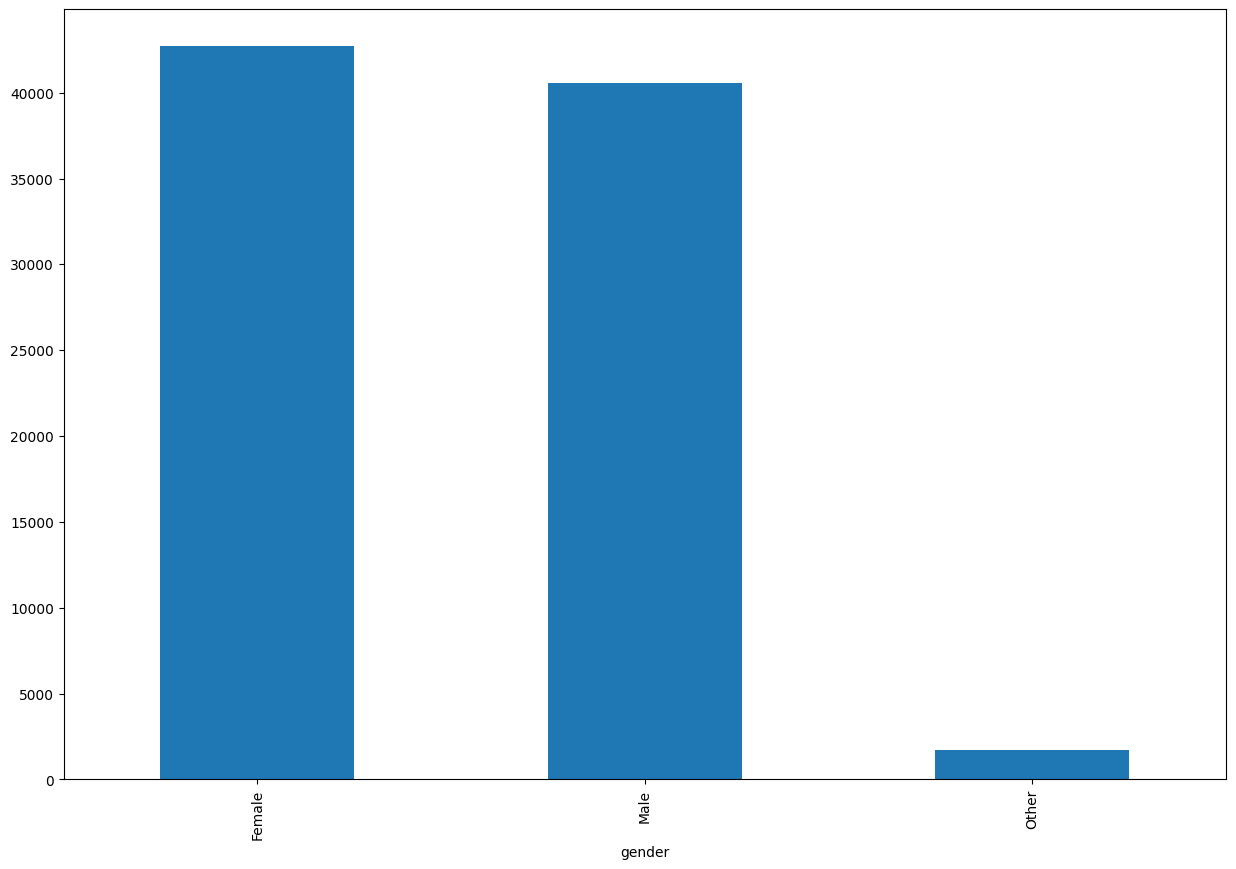

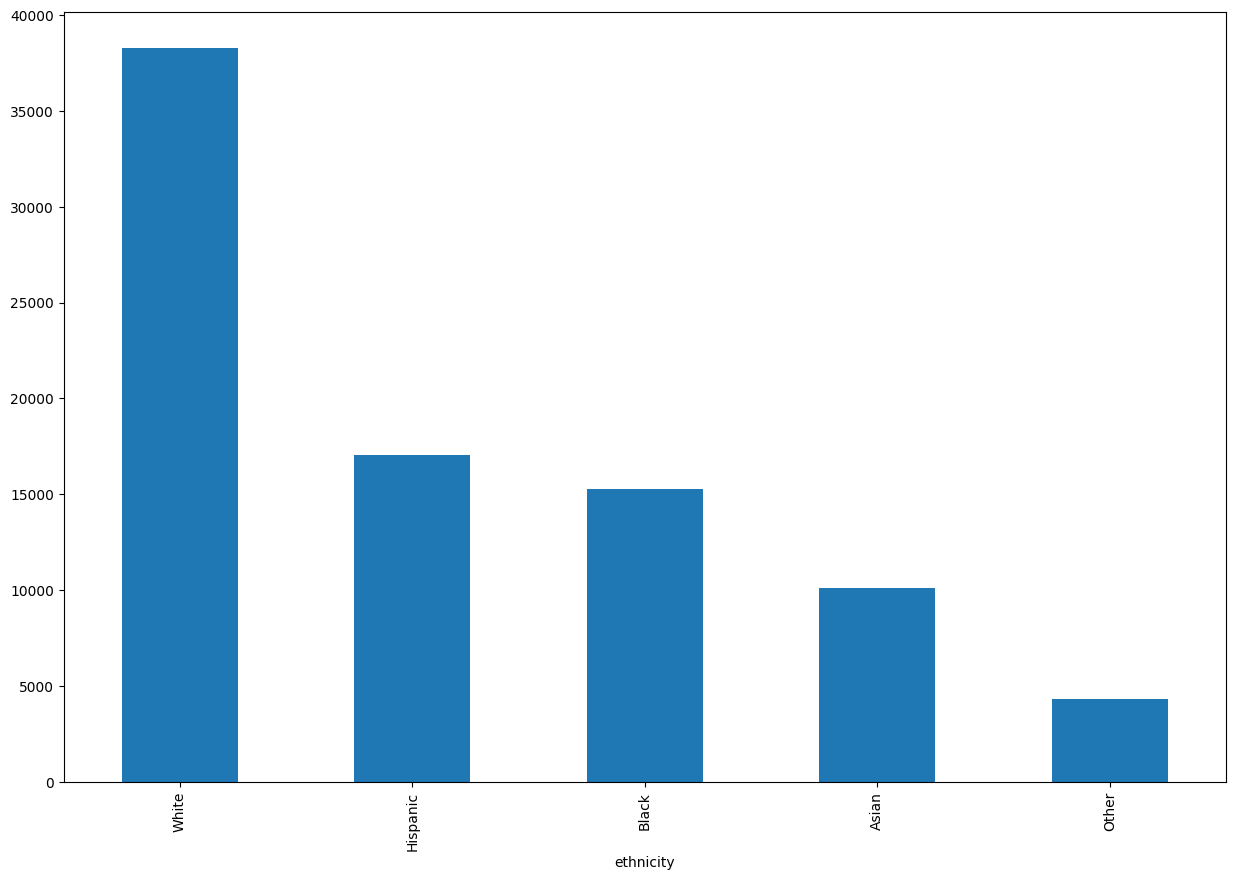

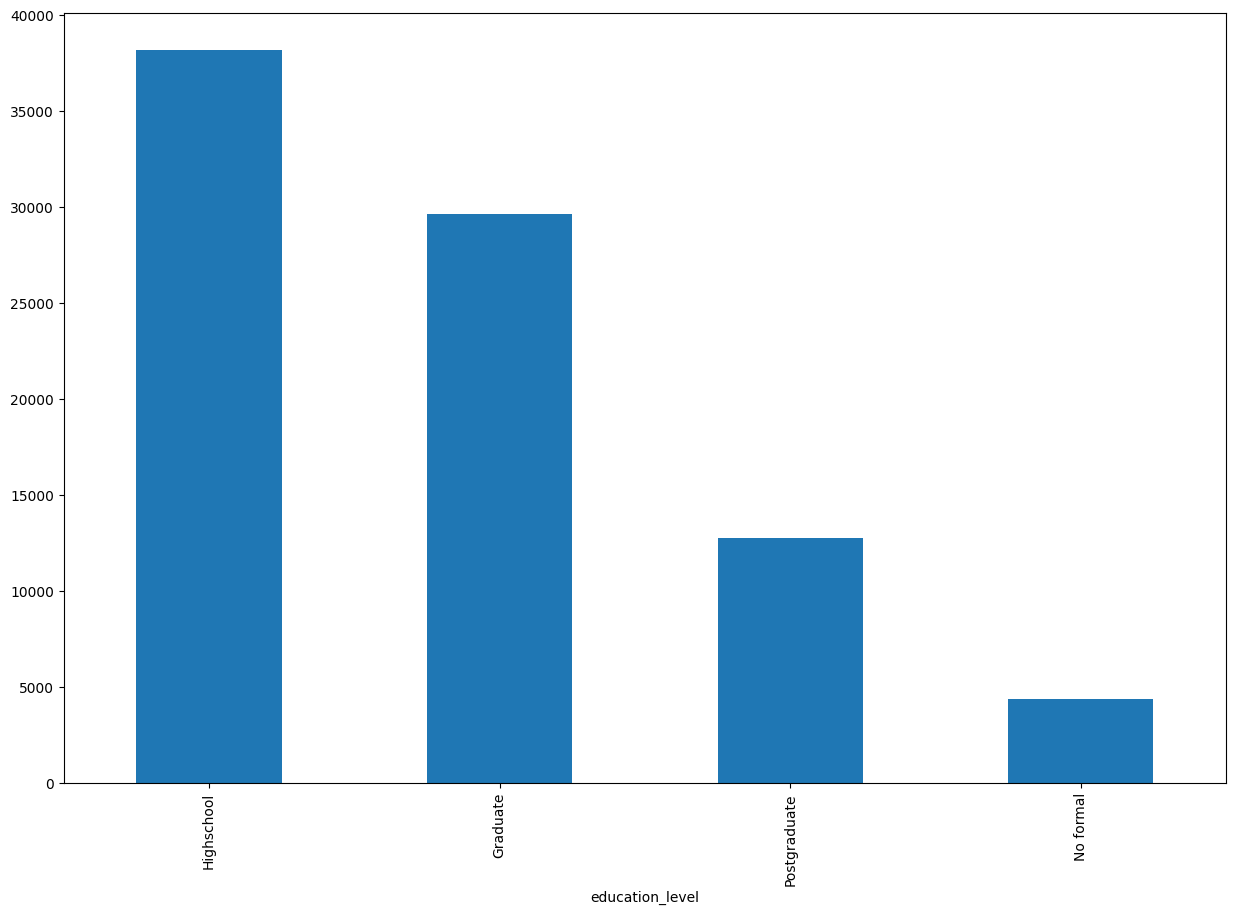

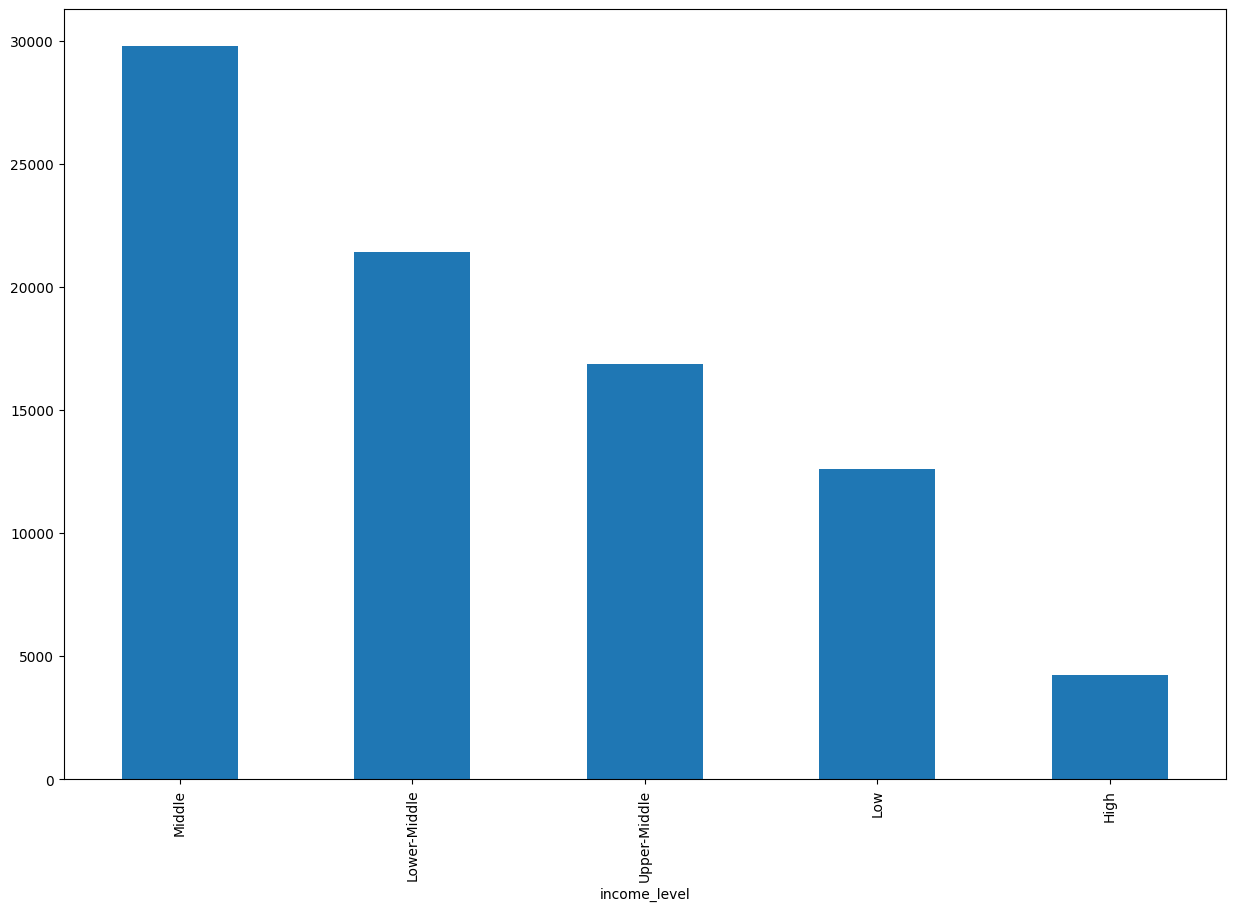

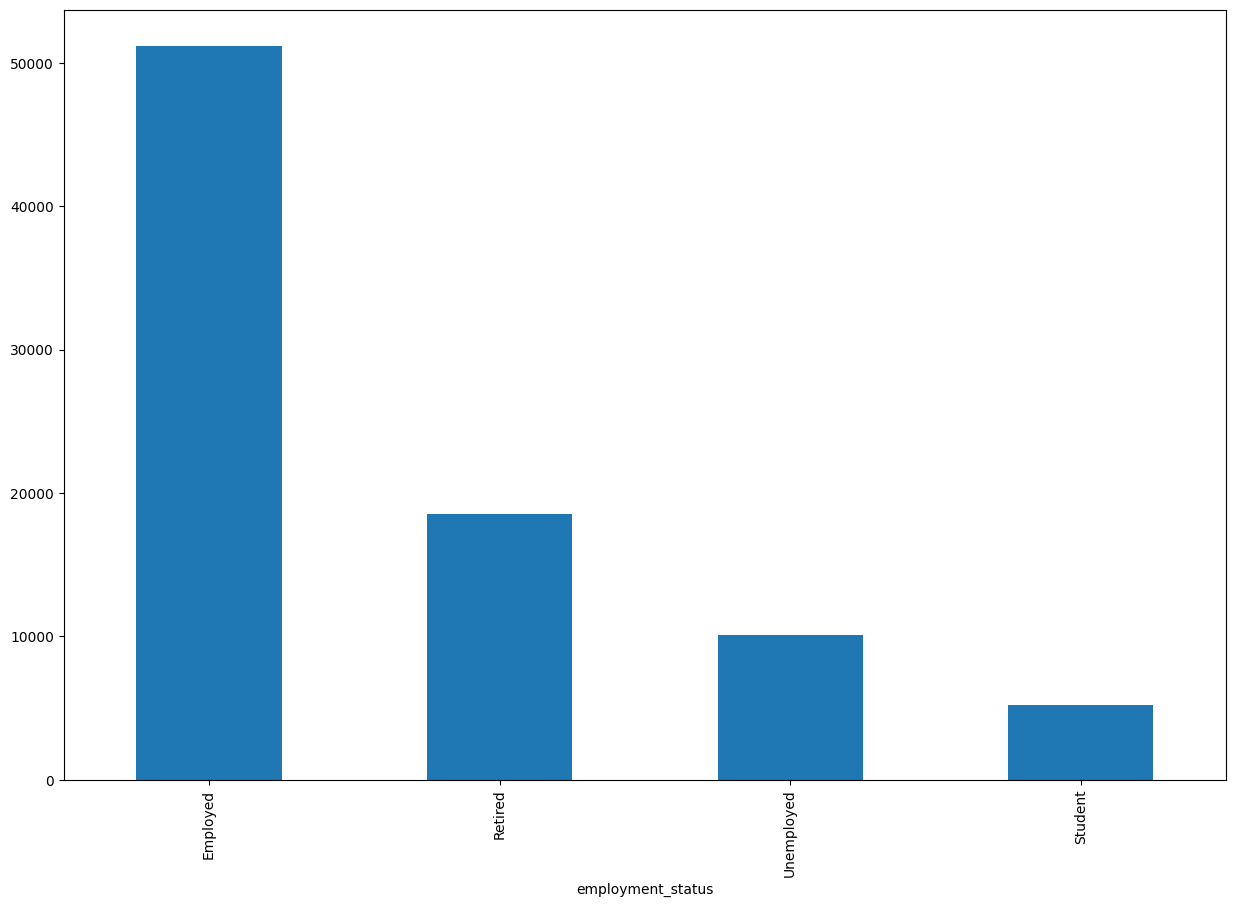

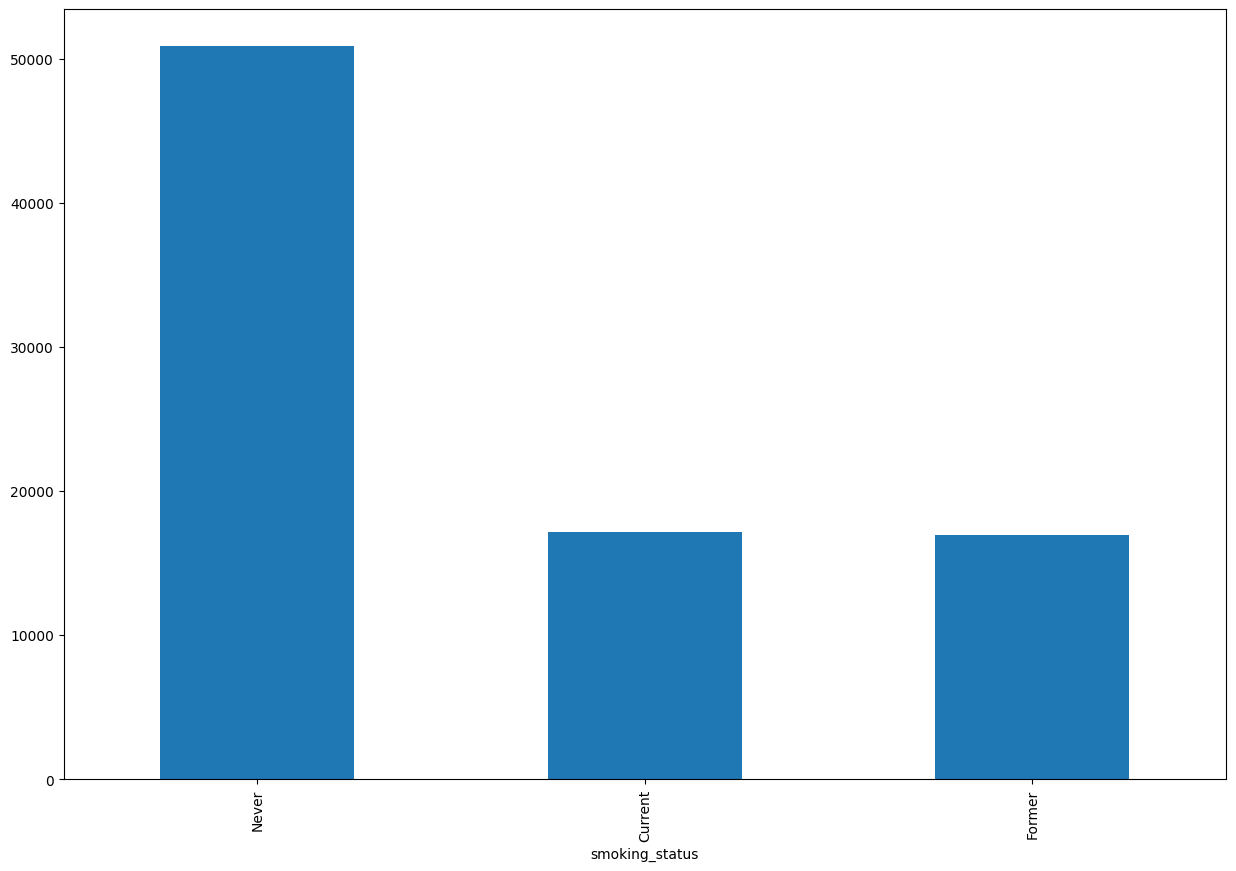

In [ ]:
for col in object_cols:
  plt.figure(figsize=(15,10))
  X_train[col].value_counts().plot(kind="bar")
  plt.show()
  print("\n")

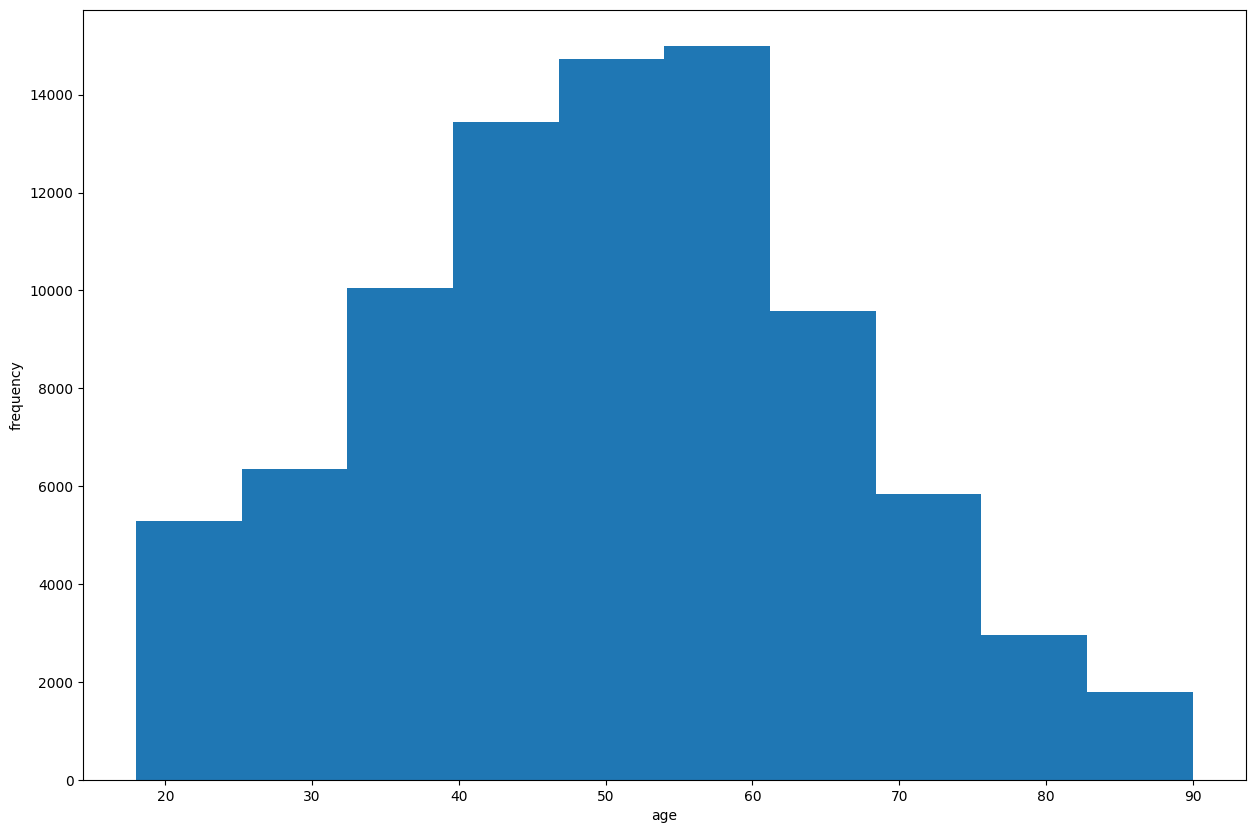

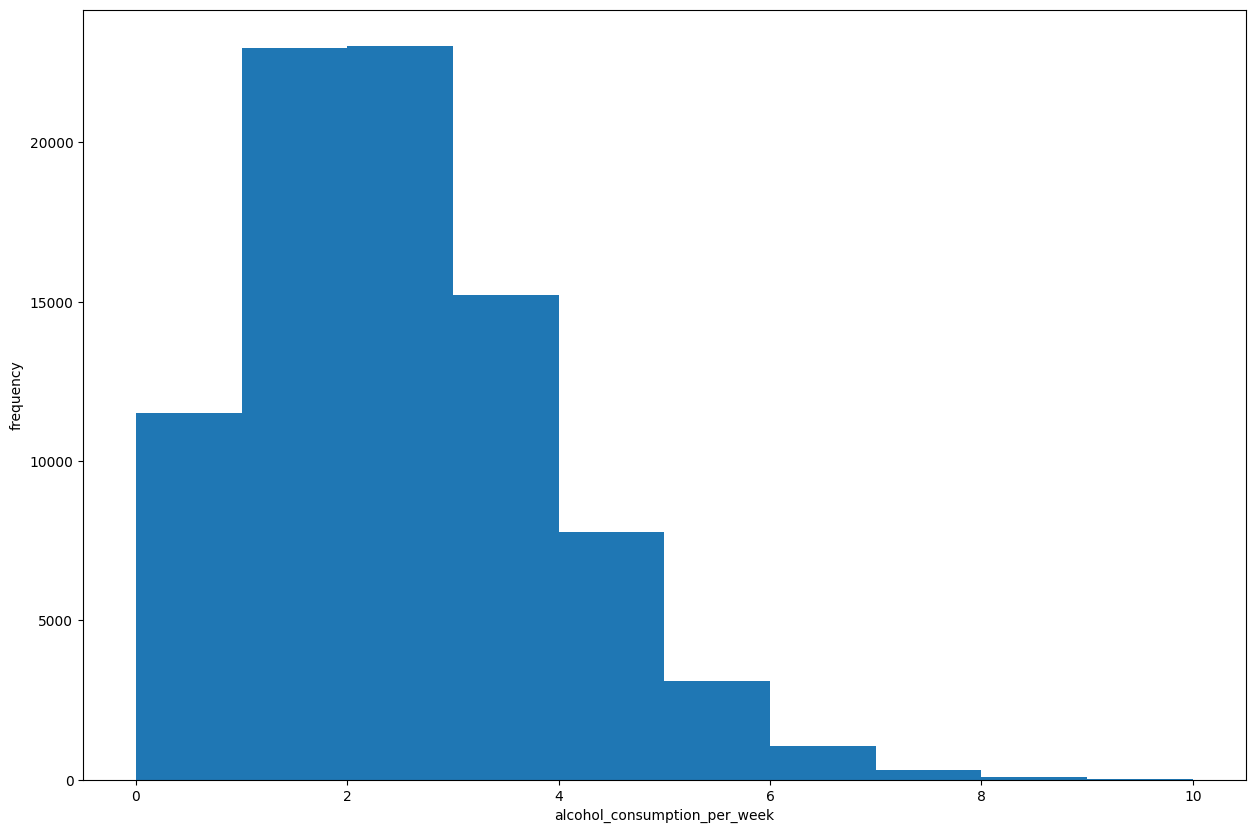

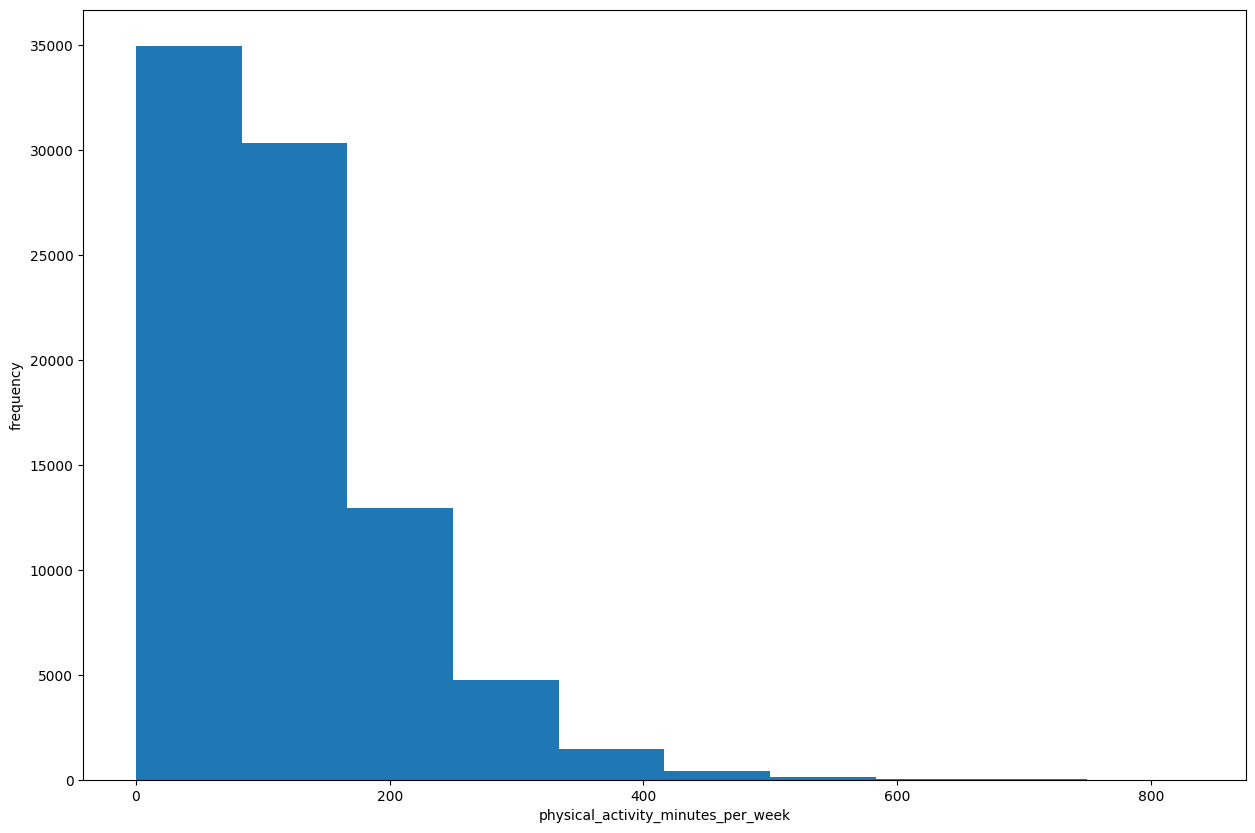

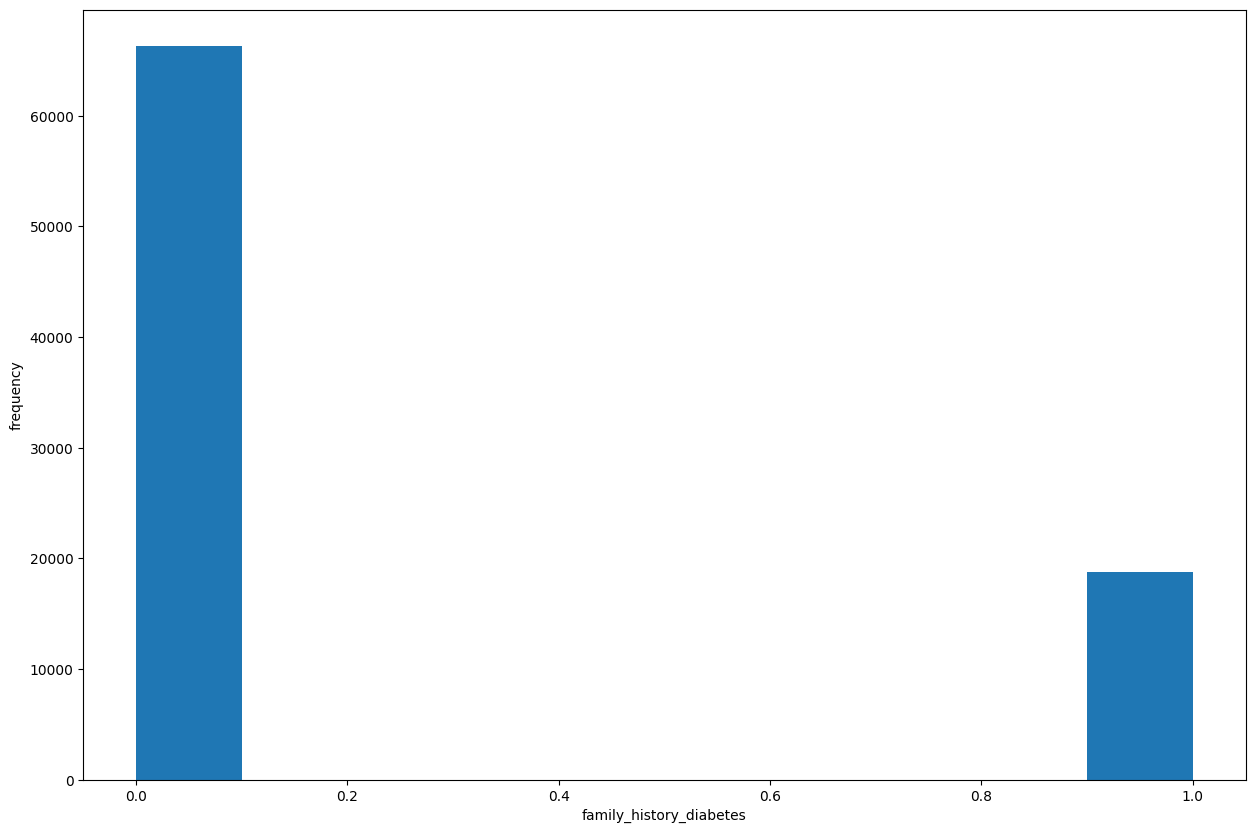

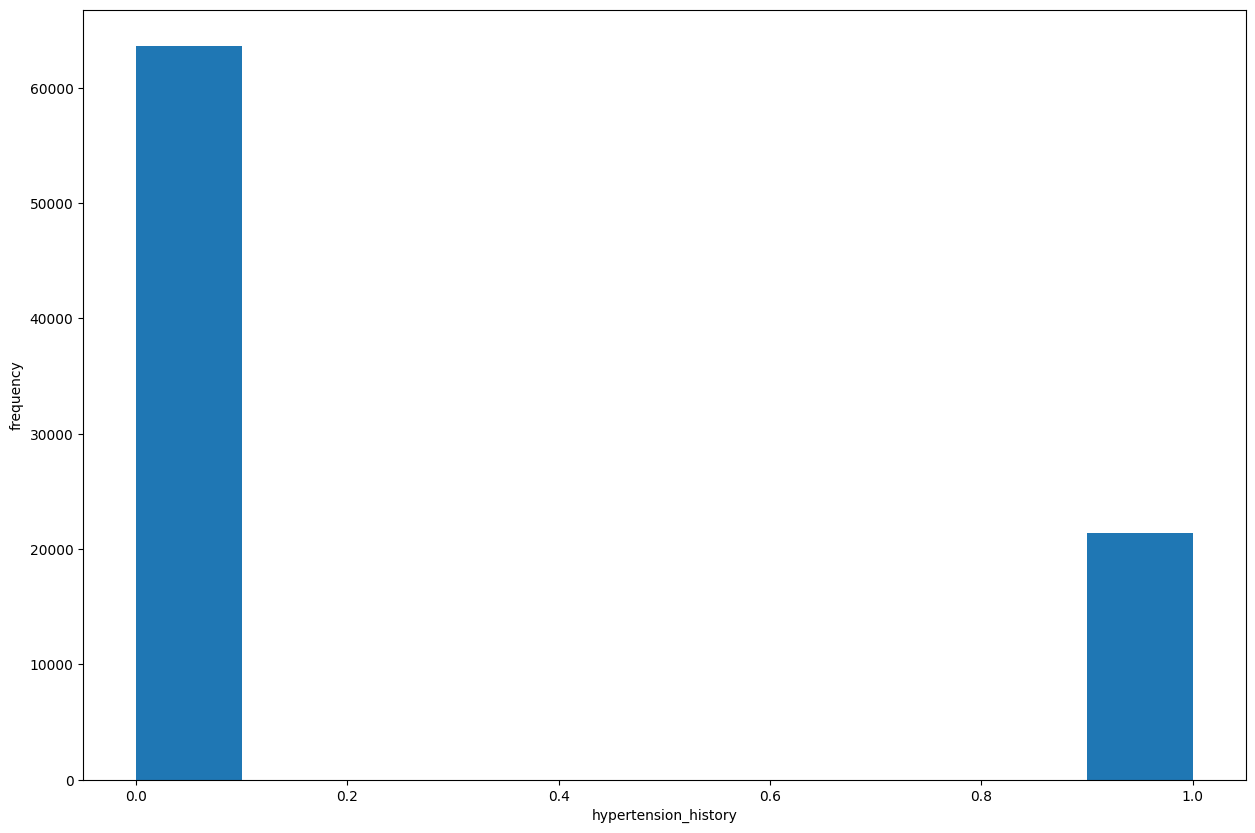

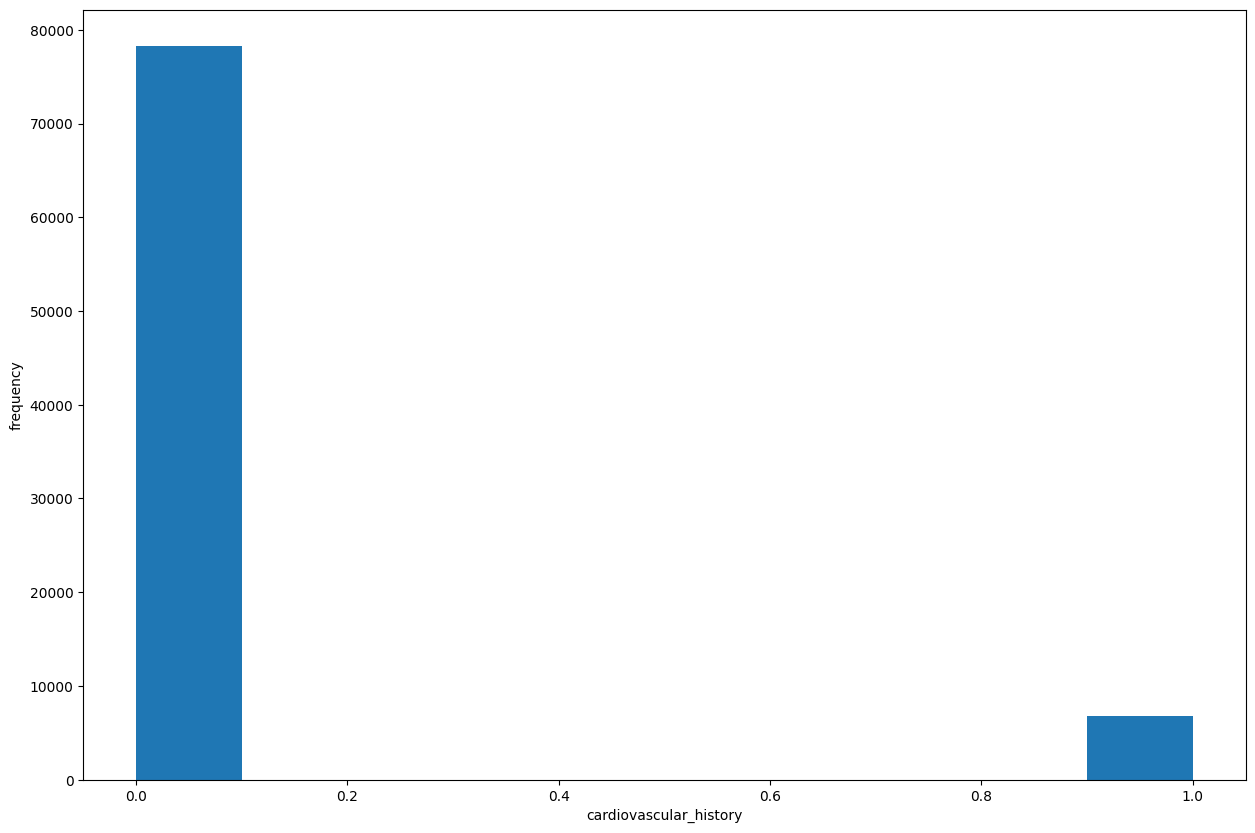

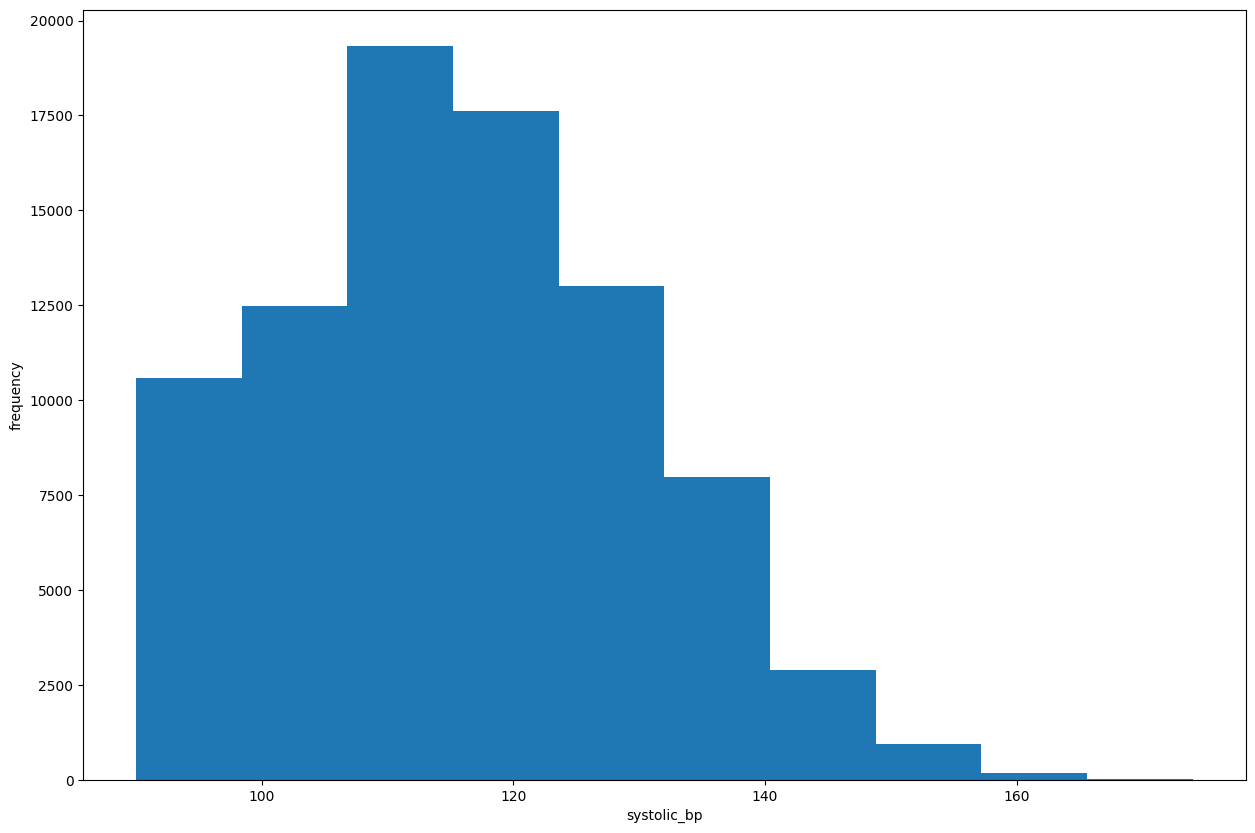

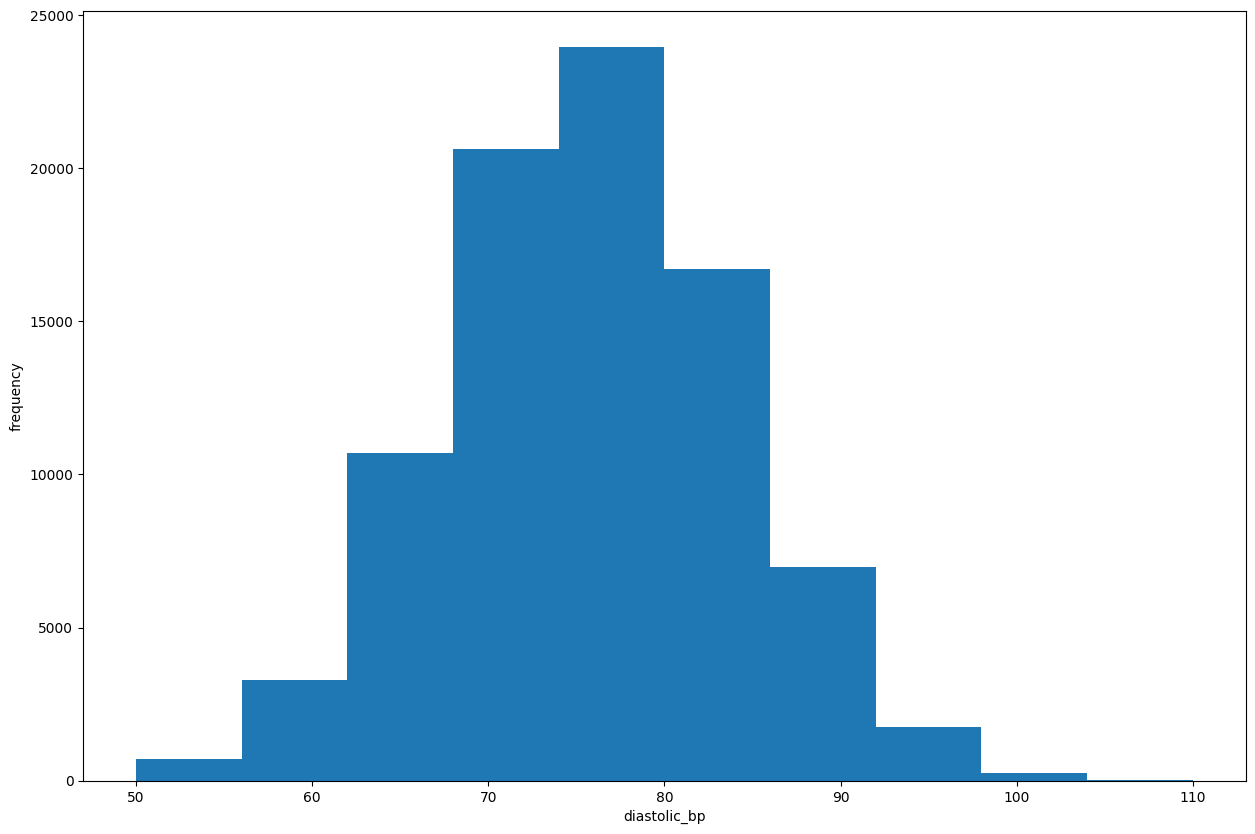

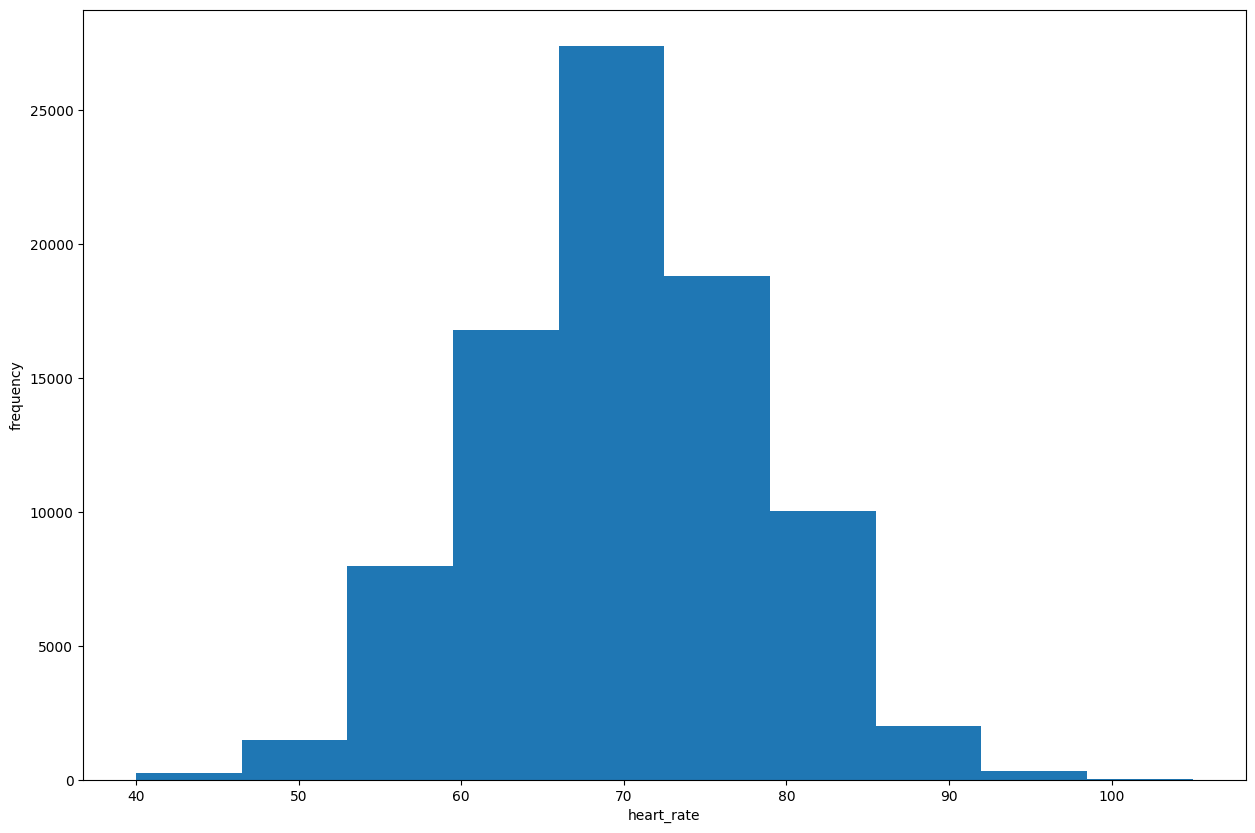

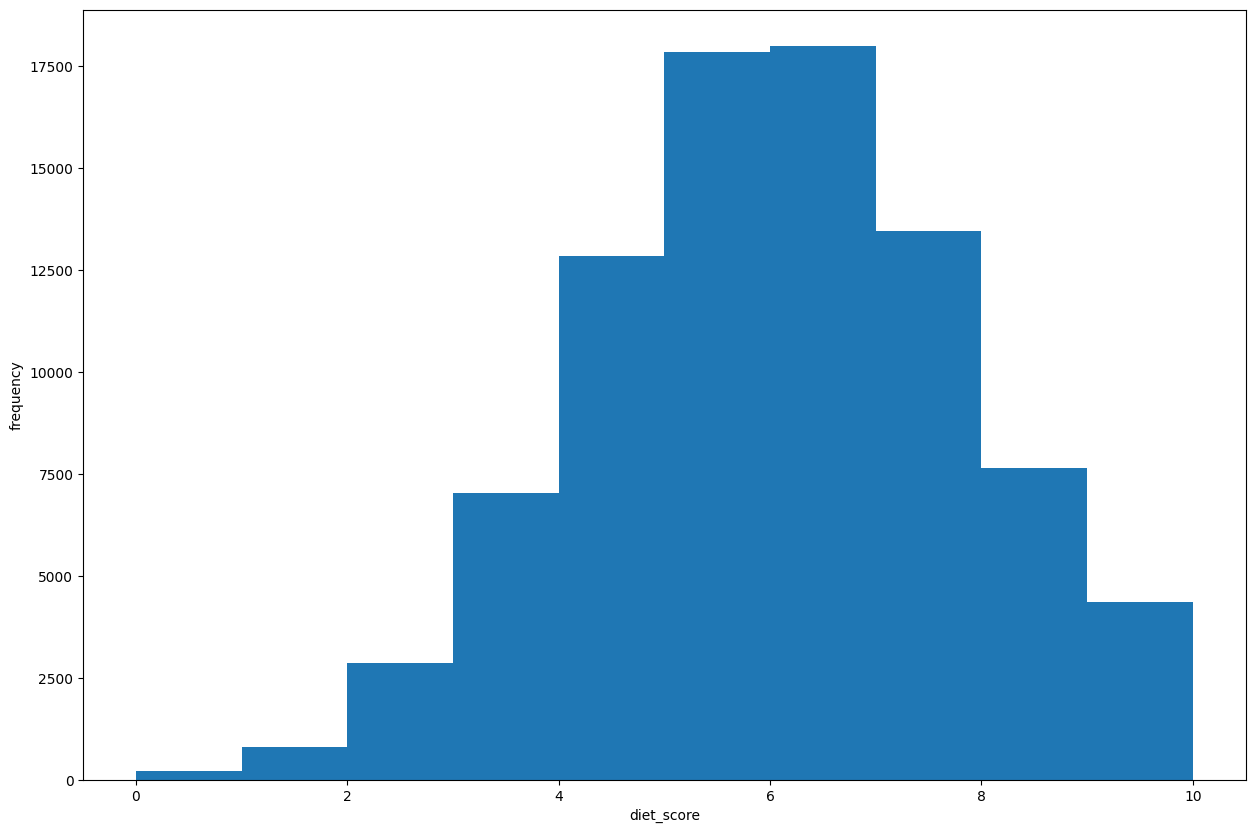

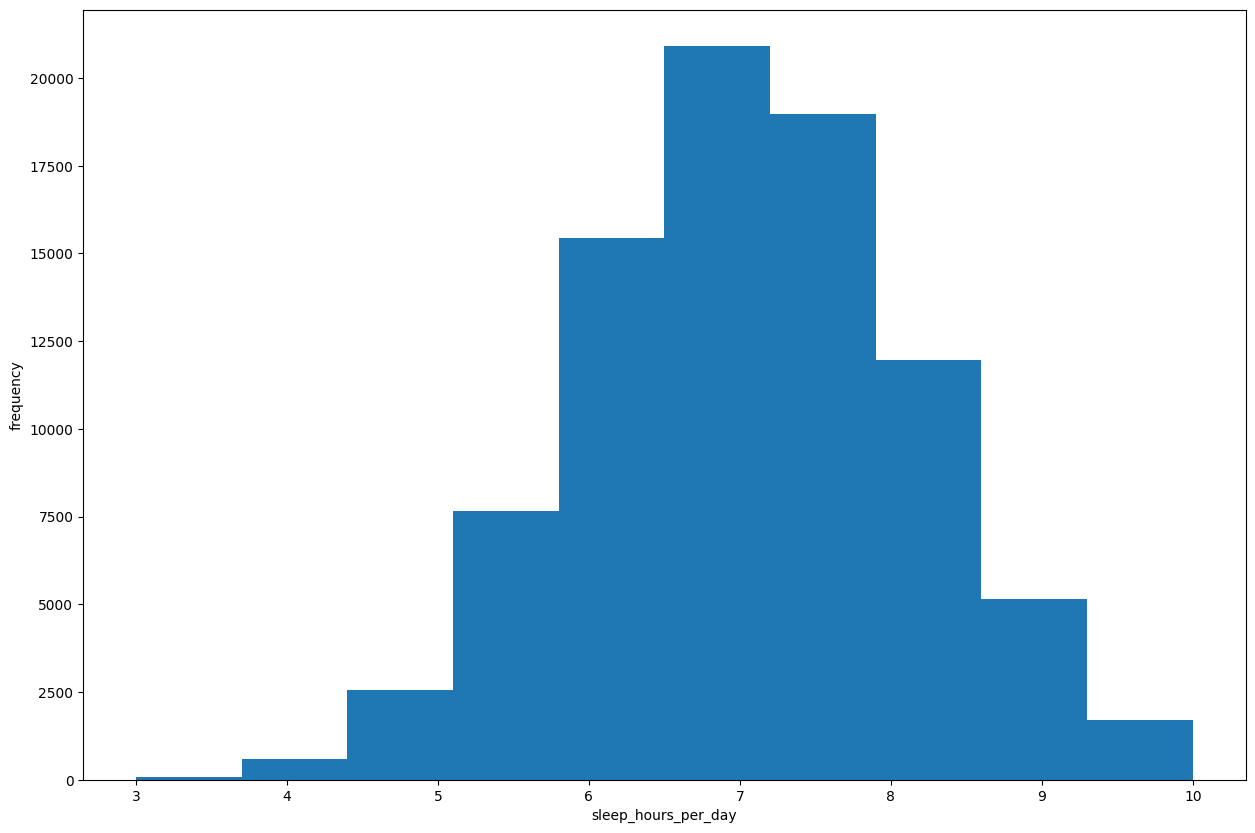

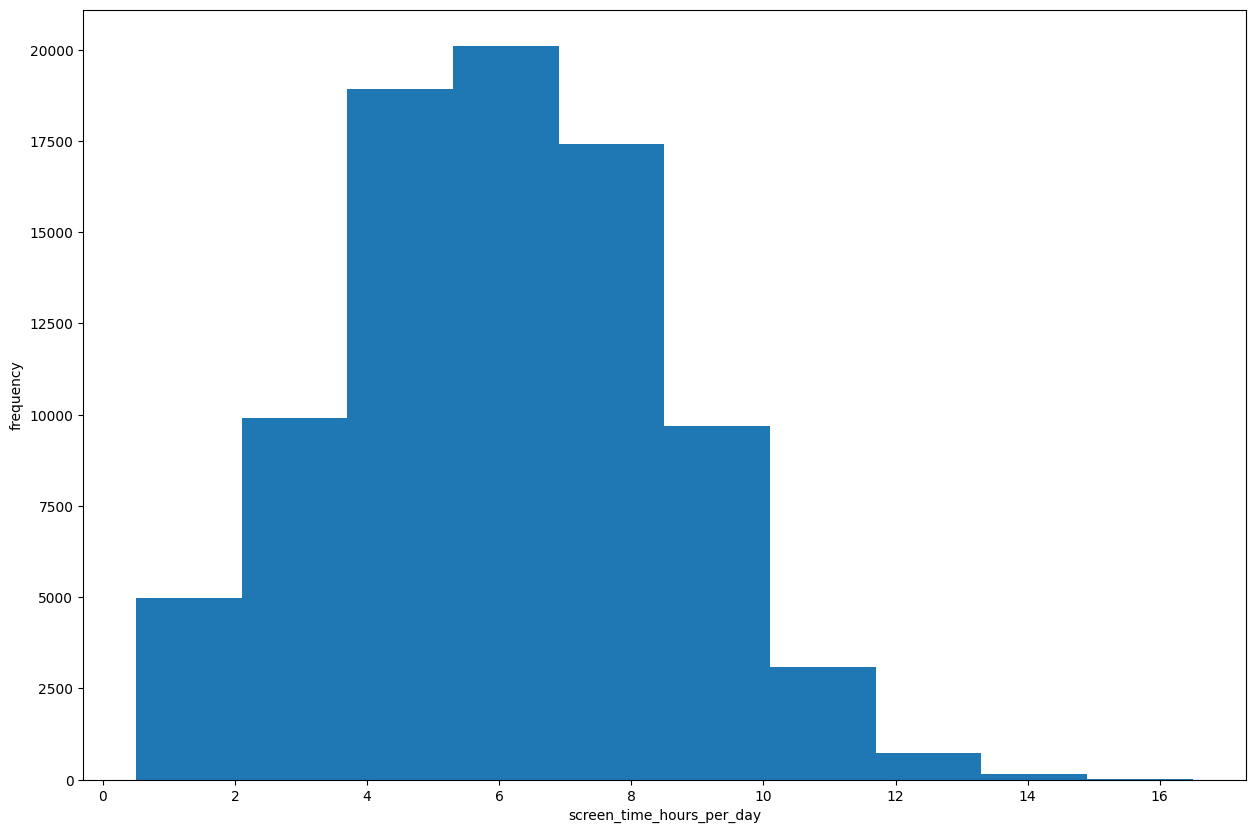

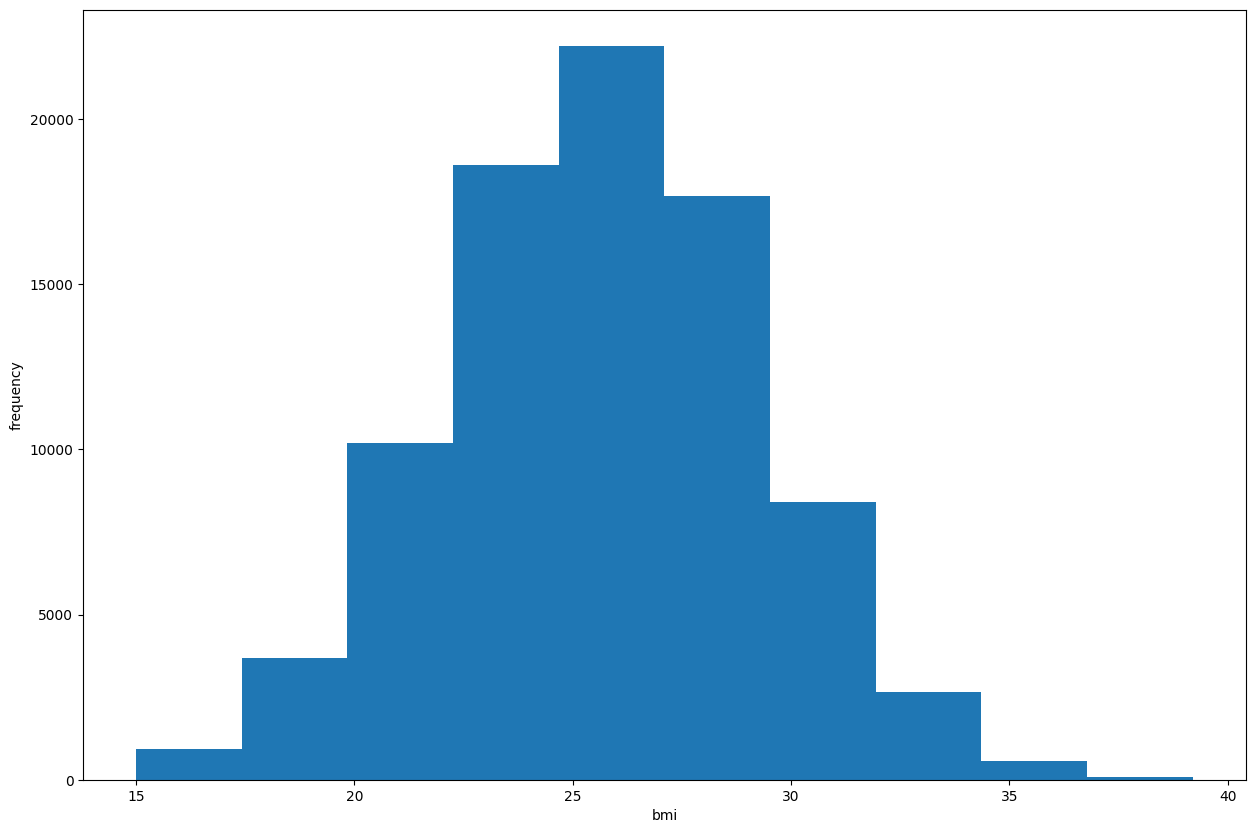

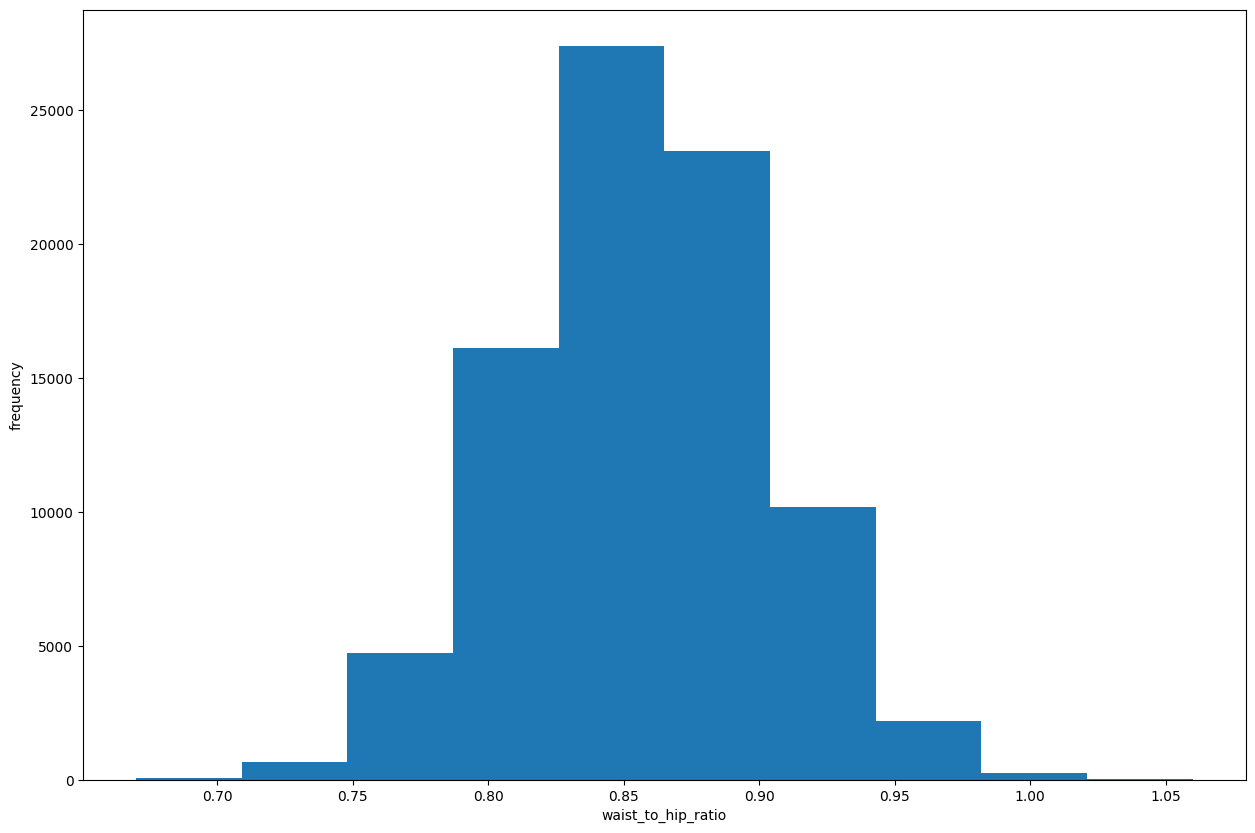

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(15,10))
  plt.hist(X_train[col])
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()
  print('\n')

In [ ]:
X_train.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate
count,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000
mean,50.129624,2.004918,119.027271,5.994766,6.999042,6.001016,0.220329,0.251624,0.079494,25.623046,0.856165,115.803106,75.243953,69.627471
std,15.593606,1.419229,84.440803,1.782058,1.096298,2.469318,0.414471,0.433949,0.270510,3.584880,0.046808,14.270627,8.210442,8.364217
min,18.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.670000,90.000000,50.000000,40.000000
25%,39.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.000000,64.000000
50%,50.000000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.000000,70.000000
75%,61.000000,3.000000,161.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,0.890000,125.000000,81.000000,75.000000
max,90.000000,10.000000,833.000000,10.000000,10.000000,16.500000,1.000000,1.000000,1.000000,39.200000,1.060000,174.000000,110.000000,105.000000


In [ ]:
def build_preprocessor(
    encode_config: list[tuple] = None,
    scale_config: list[tuple] = None,
) -> ColumnTransformer:

    """
    Build a sklearn ColumnTransformer for tabular preprocessing.

    This function ONLY constructs a preprocessing transformer.
    It does NOT fit or transform data.

    Preprocessing is defined declaratively through configuration lists and is
    applied in the following fixed order per column:

        1. Encoding
        2. Scaling

    Parameters
    ----------

    encode_config : list[tuple], optional
        List of (column, method, param) specifying encoding rules.

        method options:
        - 'onehot': param is passed to OneHotEncoder(drop=param)
            * 'first' -> drops first category (useful for linear models)
            * 'if_binary' -> drops one category from binary categories(useful for linear models)
            * None     -> keeps all categories (recommended for tree models)

        - 'ordinal': param is an ordered list of categories

        Example:
        [
            ('City', 'onehot', None),
            ('Education', 'ordinal', ['HighSchool', 'Bachelors', 'Masters'])
        ]

    scale_config : list[tuple], optional
        List of (column, strategy) specifying scaling rules.

        strategy options:
        - 'standard' → StandardScaler (z-score)
        - 'minmax'   → MinMaxScaler
        - 'robust'   → RobustScaler

        Scaling is applied only to the specified columns and is independent of
        imputation and encoding.

    Returns
    -------

    preprocessor : sklearn.compose.ColumnTransformer
        A transformer with:
        - per-column Pipelines
        - remainder="passthrough"
        - pandas output enabled
    """


    encode_config = encode_config or []
    scale_config = scale_config or []

    # Track pipeline steps per column
    col_pipelines = {}

    def get_steps(col):
        if col not in col_pipelines:
            col_pipelines[col] = []
        return col_pipelines[col]


    # -------- 1. Encoding --------
    for col, method, param in encode_config:
        steps = get_steps(col)

        if method == "onehot":
            steps.append((
                "onehot",
                OneHotEncoder(
                    handle_unknown="ignore",
                    sparse_output=False,
                    min_frequency=20,
                    drop = param,

                )
            ))

        elif method == "ordinal":
            steps.append((
                "ordinal",
                OrdinalEncoder(
                    categories=[param],
                    handle_unknown="use_encoded_value",
                    unknown_value=-1
                )
            ))

    # -------- 2. Scaling --------
    for col, strategy in scale_config:
        steps = get_steps(col)

        if strategy == "standard":
            steps.append(("scaler", StandardScaler()))
        elif strategy == "minmax":
            steps.append(("scaler", MinMaxScaler()))
        elif strategy == "robust":
            steps.append(("scaler", RobustScaler()))

    # -------- Build ColumnTransformer --------
    transformers = []
    for col, steps in col_pipelines.items():
        if steps:
            transformers.append(
                (f"pipe_{col}", Pipeline(steps), [col])
            )

    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder="passthrough",
        verbose_feature_names_out=False
    )

    preprocessor.set_output(transform="pandas")

    return preprocessor


In [ ]:
X_train.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate'],
      dtype='object')

In [ ]:
encode_config_for_linear_models = [
    ('gender','onehot','first'),
    ('ethnicity','onehot','first'),
    ('education_level','ordinal',['No formal','Highschool','Graduate','Postgraduate']),
    ('income_level','ordinal',['Low','Lower-Middle','Middle','Upper-Middle','High']),
    ('employment_status','onehot','first'),
    ('smoking_status','onehot','first')
]

scale_config_for_linear_models = [
    ('age','standard'),('alcohol_consumption_per_week','standard'),
    ('physical_activity_minutes_per_week','robust'),
    ('diet_score','standard'),('sleep_hours_per_day','standard'),
    ('screen_time_hours_per_day','standard'),
    ('bmi','standard'),('systolic_bp','standard'),
    ('diastolic_bp','standard'),('heart_rate','standard'),
    ('waist_to_hip_ratio','standard')
]

encode_config_for_tree_models = [
    ('gender','onehot',None),
    ('ethnicity','onehot',None),
    ('education_level','ordinal',['No formal','Highschool','Graduate','Postgraduate']),
    ('income_level','ordinal',['Low','Lower-Middle','Middle','Upper-Middle','High']),
    ('employment_status','onehot',None),
    ('smoking_status','onehot',None)
]

In [ ]:
preprocess_linear = build_preprocessor(
    encode_config=encode_config_for_linear_models,
    scale_config=scale_config_for_linear_models
)
preprocess_tree = build_preprocessor(
    encode_config=encode_config_for_tree_models)

In [ ]:
models = {
    "ElasticNet": Pipeline([
        ("preprocess", preprocess_linear),
        ("model", ElasticNet(
            alpha=0.1,
            l1_ratio=0.5,
            max_iter=5000,
            random_state=108
        ))
    ]),

    "RandomForest": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=8,
            min_samples_leaf=20,
            n_jobs=-1,
            random_state=108
        ))
    ]),

    "GradientBoosting": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=2,
            min_samples_leaf=20,
            random_state=108
        ))
    ])
}


In [ ]:
risk_bins = pd.qcut(
    y_train,
    q=5,              # of quintiles
    duplicates="drop"
)

X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train,
    y_train,
    train_size=25000,
    random_state=108,
    stratify=risk_bins
)

In [ ]:
results = {}

for name, pipeline in models.items():
    mae = -cross_val_score(
        pipeline,
        X_train_subset,
        y_train_subset,
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1
    ).mean()

    results[name] = mae

results


{'ElasticNet': np.float64(1.697687700259737),
 'RandomForest': np.float64(1.423117904526493),
 'GradientBoosting': np.float64(0.9836335778592084)}

In [ ]:
def objective_gb(trial):

    gbr = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 200, 400, step=50),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.08),
        max_depth=trial.suggest_int("max_depth", 1, 3),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 15, 40),
        subsample=trial.suggest_float("subsample", 0.7, 1.0),
        random_state=108
    )

    pipeline = Pipeline([
        ("preprocess", preprocess_tree),
        ("model", gbr)
    ])

    mae = -cross_val_score(
        pipeline,
        X_train_subset,
        y_train_subset,
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1
    ).mean()

    return mae


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_gb, n_trials=40)

[I 2025-12-24 07:37:22,477] A new study created in memory with name: no-name-abb5f21e-903b-4389-8cd9-503d623da905
[I 2025-12-24 07:38:35,176] Trial 0 finished with value: 0.9520961948675095 and parameters: {'n_estimators': 400, 'learning_rate': 0.04598673727129277, 'max_depth': 3, 'min_samples_leaf': 19, 'subsample': 0.863921136532086}. Best is trial 0 with value: 0.9520961948675095.
[I 2025-12-24 07:39:30,954] Trial 1 finished with value: 0.9567619854267463 and parameters: {'n_estimators': 300, 'learning_rate': 0.058441791470333015, 'max_depth': 3, 'min_samples_leaf': 26, 'subsample': 0.9562553203235346}. Best is trial 0 with value: 0.9520961948675095.
[I 2025-12-24 07:40:37,087] Trial 2 finished with value: 0.9574813592557648 and parameters: {'n_estimators': 400, 'learning_rate': 0.03451848368302445, 'max_depth': 3, 'min_samples_leaf': 32, 'subsample': 0.8515159590063129}. Best is trial 0 with value: 0.9520961948675095.
[I 2025-12-24 07:41:21,861] Trial 3 finished with value: 0.95577

In [ ]:
study.best_params

{'n_estimators': 350,
 'learning_rate': 0.05536298789161556,
 'max_depth': 3,
 'min_samples_leaf': 19,
 'subsample': 0.9167717684880315}

In [ ]:
study.best_value

0.9515027140123768

In [ ]:
study.trials_dataframe().sort_values(by="value", ascending=True).to_csv('/content/model_1_gb_study.csv')

In [ ]:
gbr_pipeline  =  Pipeline([
        ("preprocess", preprocess_tree),
        ("model", GradientBoostingRegressor(
          n_estimators=350,
          learning_rate=0.055,
          max_depth=3,
          min_samples_leaf=19,
          subsample=0.917,
          random_state = 108
        ))
    ])

In [ ]:
gbr_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['ethnici...
                                                                                 sparse_output=False))]),
                                                  ['employment_status']),
                                                 ('pipe_smoking_status',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.055,
                                           min_samples_leaf=19,
                                           n_estimators=350, random_state=108,
                                           subsample=0.917))])

In [ ]:
gbr_y_pred = gbr_pipeline.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, gbr_y_pred)

print(f"Test MAE: {mae:.4f}")

Test MAE: 0.9433


In [ ]:
gbr_pipeline.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['ethnici...
                                                                                 sparse_output=False))]),
                                                  ['employment_status']),
                                                 ('pipe_smoking_status',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.055,
                                           min_samples_leaf=19,
                                           n_estimators=350, random_state=108,
                                           subsample=0.917))])

In [ ]:
joblib.dump(gbr_pipeline, "diabetes_risk_model_gbr.pkl")


['diabetes_risk_model_gbr.pkl']

#SECOND STEP

In [ ]:
def generate_oof_predictions(
    pipeline,
    X: pd.DataFrame,
    y: pd.Series,
    n_splits: int = 5,
    random_state: int = 108,
):
    """
    Generate out-of-fold (OOF) predictions for a regression model.

    Parameters
    ----------
    pipeline : sklearn Pipeline
        Pipeline containing preprocessing + trained estimator (unfitted).
    X : pd.DataFrame
        Feature matrix (raw, unprocessed).
    y : pd.Series
        Target variable (diabetes_risk_score).
    n_splits : int, default=5
        Number of CV folds.
    random_state : int, default=108
        Random seed for reproducibility.

    Returns
    -------
    oof_preds : pd.Series
        Out-of-fold predictions aligned with X.index.
    """

    kf = KFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    oof_preds = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]

        # Clone pipeline to avoid contamination between folds
        model = clone(pipeline)

        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)

    return pd.Series(oof_preds, index=X.index, name="risk_score_pred")


In [ ]:
risk_oof = generate_oof_predictions(
    pipeline=gbr_pipeline,
    X=X,
    y=y,
)

In [ ]:
features_for_prediction = ['age', 'gender',
                           'ethnicity', 'education_level',
                           'income_level', 'employment_status',
                           'smoking_status', 'alcohol_consumption_per_week',
                           'physical_activity_minutes_per_week',
                           'diet_score', 'sleep_hours_per_day',
                           'screen_time_hours_per_day',
                           'family_history_diabetes',
                           'hypertension_history',
                           'cardiovascular_history', 'bmi',
                           'waist_to_hip_ratio', 'systolic_bp',
                           'diastolic_bp', 'heart_rate',
                           'cholesterol_total', 'hdl_cholesterol',
                           'ldl_cholesterol', 'triglycerides',
                           'glucose_fasting', 'glucose_postprandial',
                           'insulin_level', 'hba1c']
feature_to_predict = 'diagnosed_diabetes'

In [ ]:
X_model2 = df[features_for_prediction]
y_model2 = df[feature_to_predict]
X_model2['diabetes_risk_score_pred'] = risk_oof
X_model2.head()

/tmp/ipython-input-3264790643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_model2['diabetes_risk_score_pred'] = risk_oof


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score_pred
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,68,239,41,160,145,136,236,6.36,8.18,28.095521
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,67,116,55,50,30,93,150,2.00,5.63,23.834685
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,74,213,66,99,36,118,195,5.07,7.51,46.486295
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,68,171,50,79,140,139,253,5.28,9.03,37.767907
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,67,210,52,125,160,137,184,12.74,7.20,22.455093


In [ ]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(
    X_model2,
    y_model2,
    test_size=0.2,
    random_state=108
)

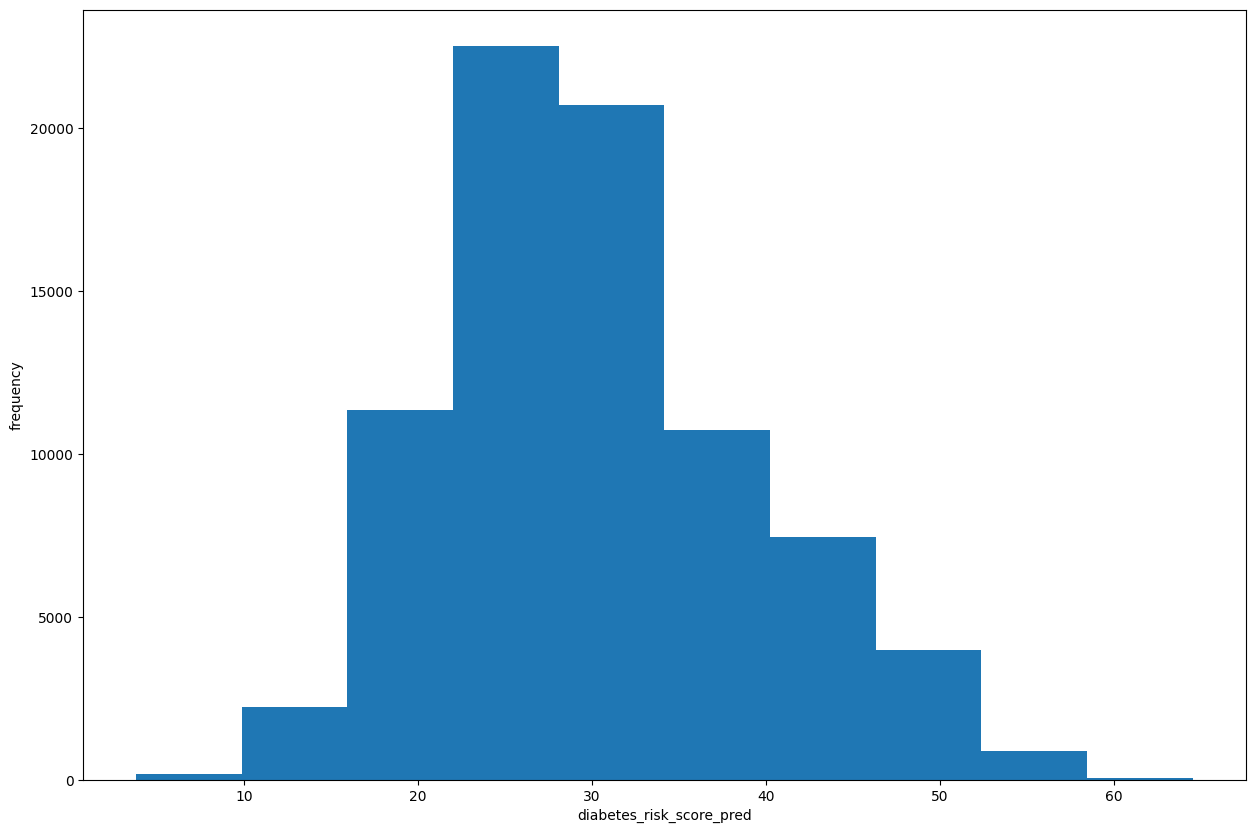

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(X_train_2['diabetes_risk_score_pred'])
plt.xlabel('diabetes_risk_score_pred')
plt.ylabel("frequency")
plt.show()

In [ ]:
scale_config_for_linear_models_2 = [
    ('age','standard'),('alcohol_consumption_per_week','standard'),
    ('physical_activity_minutes_per_week','robust'),
    ('diet_score','standard'),('sleep_hours_per_day','standard'),
    ('screen_time_hours_per_day','standard'),
    ('bmi','standard'),('systolic_bp','standard'),
    ('diastolic_bp','standard'),('heart_rate','standard'),
    ('waist_to_hip_ratio','standard'),
    ('diabetes_risk_score_pred','standard')
]


In [ ]:
preprocess_linear_2 = build_preprocessor(
    encode_config=encode_config_for_linear_models,
    scale_config=scale_config_for_linear_models_2)


In [ ]:
X_train_2_subset, _, y_train_2_subset, _ = train_test_split(
    X_train_2, y_train_2,
    train_size=25000,
    stratify=y_train_2,
    random_state=108
)


In [ ]:
neg = (y_train_2_subset == 0).sum()
pos = (y_train_2_subset == 1).sum()
class_ratio = neg / pos

models = {
    "LogisticRegression": Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", LogisticRegression(
            max_iter=3000,
            class_weight="balanced",
            n_jobs=-1,
            random_state=108
        ))
    ]),

    "RandomForest": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", RandomForestClassifier(
            n_estimators=300,
            max_depth=6,
            min_samples_leaf=10,
            class_weight="balanced",
            n_jobs=-1,
            random_state=108
        ))
    ]),

    "GradientBoosting": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", GradientBoostingClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=2,
            min_samples_leaf=20,
            random_state=108
        ))
    ]),

    "XGBoost": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", XGBClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=2,
            subsample=0.8,
            colsample_bytree=0.8,
            scale_pos_weight=class_ratio,
            eval_metric="aucpr",
            n_jobs=-1,
            random_state=108
        ))
    ])
}

results = {}

for name, pipeline in models.items():
    recall = cross_val_score(
        pipeline,
        X_train_2_subset,
        y_train_2_subset,
        cv=5,
        scoring="recall",
        n_jobs=-1
    ).mean()

    results[name] = recall

results


{'LogisticRegression': np.float64(0.8782178893965323),
 'RandomForest': np.float64(0.8675470431438008),
 'GradientBoosting': np.float64(0.8679471987660552),
 'XGBoost': np.float64(0.8678805098697564)}

In [ ]:
def objective_log_reg(trial):

    C = trial.suggest_float("C", 0.01, 10.0, log=True)

    log_reg = LogisticRegression(
        C=C,
        penalty="l2",
        solver="lbfgs",
        class_weight="balanced",
        max_iter=4000,
        n_jobs=-1,
        random_state=108
    )

    pipeline = Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", log_reg)
    ])

    recall = cross_val_score(
        pipeline,
        X_train_2_subset,
        y_train_2_subset,
        cv=5,
        scoring="recall",
        n_jobs=-1
    ).mean()

    return recall


In [ ]:
study_log_reg = optuna.create_study(direction="maximize",study_name="log_reg_recall_study")
study_log_reg.optimize(objective_log_reg, n_trials=30)


[I 2025-12-24 09:22:12,221] A new study created in memory with name: log_reg_recall_study
[I 2025-12-24 09:22:50,415] Trial 0 finished with value: 0.8786848006484705 and parameters: {'C': 0.9456940171878264}. Best is trial 0 with value: 0.8786848006484705.
[I 2025-12-24 09:23:16,087] Trial 1 finished with value: 0.8739494886109469 and parameters: {'C': 0.016628504662514504}. Best is trial 0 with value: 0.8786848006484705.
[I 2025-12-24 09:23:51,122] Trial 2 finished with value: 0.8782846672706779 and parameters: {'C': 4.02431329889365}. Best is trial 0 with value: 0.8786848006484705.
[I 2025-12-24 09:24:29,174] Trial 3 finished with value: 0.8781512894780805 and parameters: {'C': 1.298366738480525}. Best is trial 0 with value: 0.8786848006484705.
[I 2025-12-24 09:24:58,794] Trial 4 finished with value: 0.8776844449595274 and parameters: {'C': 0.043540895875982547}. Best is trial 0 with value: 0.8786848006484705.
[I 2025-12-24 09:25:26,004] Trial 5 finished with value: 0.876017089085287

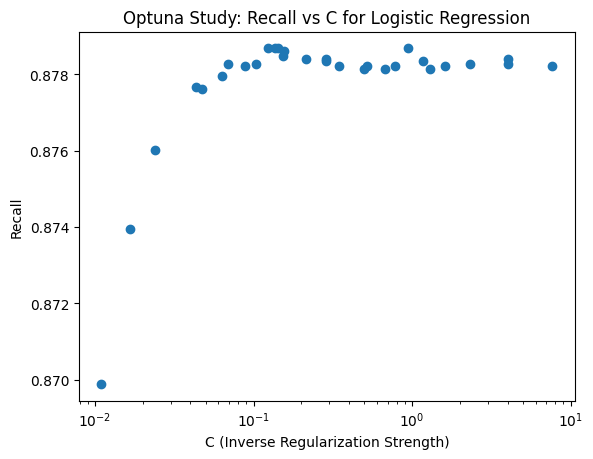

In [ ]:
C_values = study_log_reg.trials_dataframe()["params_C"]
recall_values = study_log_reg.trials_dataframe()["value"]

plt.figure()
plt.scatter(C_values, recall_values)
plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Recall")
plt.title("Optuna Study: Recall vs C for Logistic Regression")
plt.show()

In [ ]:
log_reg_pipeline = Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", LogisticRegression(
          C = 0.1241,
          penalty="l2",
          solver="lbfgs",
          class_weight="balanced",
          max_iter=5000,
          n_jobs=-1,
          random_state=108
))
    ])


In [ ]:
log_reg_pipeline.fit(X_train_2,y_train_2)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_...
                                                  ['heart_rate']),
                                                 ('pipe_waist_to_hip_ratio',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['waist_to_hip_ratio']),
                                                 ('pipe_diabetes_risk_score_pred',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['diabetes_risk_score_pred'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LogisticRegression(C=0.1241, class_weight='balanced',
                                    max_iter=5000, n_jobs=-1,
                                    random_state=108))])

In [ ]:
n_iter = log_reg_pipeline.named_steps["model"].n_iter_
print(n_iter)

[5000]


In [ ]:
y_pred2_logreg = log_reg_pipeline.predict(X_test_2)

Classification report for Model : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7983
           1       0.93      0.87      0.90     12017

    accuracy                           0.89     20000
   macro avg       0.88      0.89      0.88     20000
weighted avg       0.89      0.89      0.89     20000




Confusion Matrix for Model : 


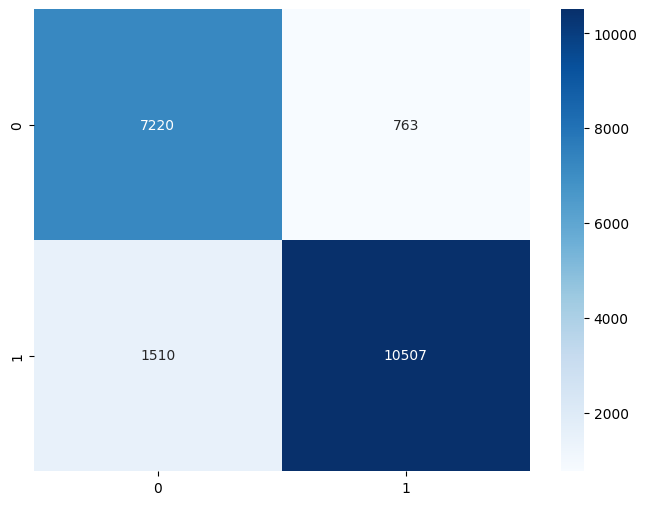

In [ ]:
print("Classification report for Model : ")
print(classification_report(y_test_2, y_pred2_logreg))
print("\n\n")

print("Confusion Matrix for Model : ")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_2, y_pred2_logreg), annot=True, fmt='d', cmap='Blues')
plt.show()


In [ ]:

# probabilities for positive class
y_proba = log_reg_pipeline.predict_proba(X_test_2)[:, 1]

# PR-AUC (Average Precision)
pr_auc = average_precision_score(y_test_2, y_proba)

print(f"PR-AUC: {pr_auc:.4f}")


PR-AUC: 0.9666


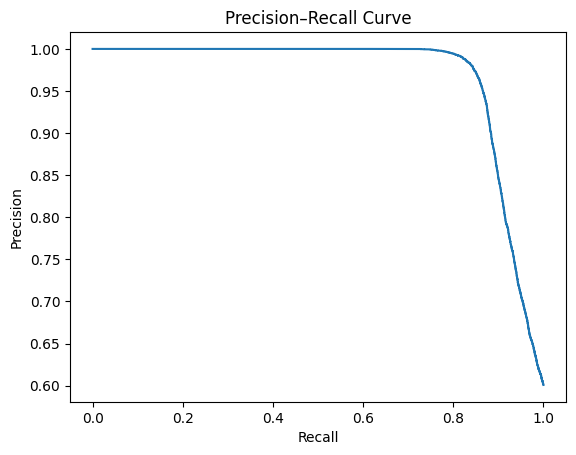

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_2, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    log_reg_pipeline,
    X_test_2,
    y_test_2,
    n_repeats=10,
    scoring="recall",
    random_state=108,
    n_jobs=-1
)

perm_importance = pd.DataFrame({
    "feature": X_test_2.columns,
    "importance": result.importances_mean
}).sort_values("importance", ascending=False)

perm_importance


,feature,importance
27,hba1c,0.281410
24,glucose_fasting,0.002447
12,family_history_diabetes,0.000691
8,physical_activity_minutes_per_week,0.000508
0,age,0.000316
22,ldl_cholesterol,0.000300
25,glucose_postprandial,0.000275
20,cholesterol_total,0.000225
18,diastolic_bp,0.000200
15,bmi,0.000150


In [ ]:
log_reg_pipeline.fit(X_model2,y_model2)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_...
                                                  ['heart_rate']),
                                                 ('pipe_waist_to_hip_ratio',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['waist_to_hip_ratio']),
                                                 ('pipe_diabetes_risk_score_pred',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['diabetes_risk_score_pred'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LogisticRegression(C=0.1241, class_weight='balanced',
                                    max_iter=5000, n_jobs=-1,
                                    random_state=108))])

In [ ]:
joblib.dump(gbr_pipeline, "diagnosed_diabetes_model_log_reg.pkl")


['diagnosed_diabetes_model_log_reg.pkl']

In [ ]:

def generate_oof_probabilities_binary(
    pipeline,
    X: pd.DataFrame,
    y: pd.Series,
    n_splits: int = 5,
    random_state: int = 108
):
    """
    Generate out-of-fold predicted probabilities for binary classification.
    Returns probability of positive class.
    """

    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    oof_probs = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]

        model = clone(pipeline)
        model.fit(X_train_fold, y_train_fold)

        oof_probs[val_idx] = model.predict_proba(X_val_fold)[:, 1]

    return pd.Series(oof_probs, index=X.index, name="diagnosed_diabetes_prob")


In [ ]:
diagnosed_diabetes_prob = generate_oof_probabilities_binary(
    pipeline=log_reg_pipeline,
    X=X_model2,
    y=y_model2
)


In [ ]:
df['diagnosed_diabetes_prob'] = diagnosed_diabetes_prob
df['diabetes_risk_score_pred'] = risk_oof
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes,diagnosed_diabetes_prob,diabetes_risk_score_pred
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,145,136,236,6.36,8.18,29.6,Type 2,1,0.999397,28.095521
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,30,93,150,2.00,5.63,23.0,No Diabetes,0,0.037350,23.834685
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,36,118,195,5.07,7.51,44.7,Type 2,1,0.991806,46.486295
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,140,139,253,5.28,9.03,38.2,Type 2,1,0.999977,37.767907
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,160,137,184,12.74,7.20,23.5,Type 2,1,0.968359,22.455093


In [ ]:
df = df.drop(columns=['diabetes_risk_score'])

In [ ]:
dfmodel_3 = df[df['diagnosed_diabetes'] == 1]
dfmodel_3.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_stage,diagnosed_diabetes,diagnosed_diabetes_prob,diabetes_risk_score_pred
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,160,145,136,236,6.36,8.18,Type 2,1,0.999397,28.095521
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,99,36,118,195,5.07,7.51,Type 2,1,0.991806,46.486295
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,79,140,139,253,5.28,9.03,Type 2,1,0.999977,37.767907
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,125,160,137,184,12.74,7.20,Type 2,1,0.968359,22.455093
7,62,Male,White,Postgraduate,Middle,Unemployed,Current,1,75,4.1,...,159,120,110,189,8.96,7.04,Type 2,1,0.932489,33.569031


In [ ]:
dfmodel_3.shape

(59998, 32)

In [ ]:
Xmodel_3 = dfmodel_3.drop(columns=['diabetes_stage','diagnosed_diabetes'])
ymodel_3 = dfmodel_3['diabetes_stage']

In [ ]:
le = LabelEncoder()
ymodel_3 = pd.Series(le.fit_transform(ymodel_3))

In [ ]:
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(Xmodel_3,ymodel_3,
                                                         test_size=0.15,
                                                         stratify=ymodel_3,
                                                         random_state=108)

In [ ]:
y_train_3.value_counts()

,count
2,50808
0,134
1,56


In [ ]:
X_train_3_subset, _, y_train_3_subset, _ = train_test_split(
    X_train_3, y_train_3,
    train_size=15000,
    stratify=y_train_3,
    random_state=108)

In [ ]:

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=108
)

models = {
    "LogisticRegression": Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", LogisticRegression(
            multi_class="multinomial",
            solver="lbfgs",
            class_weight="balanced",
            max_iter=5000,
            random_state=108
        ))
    ]),

    "RandomForest": Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", RandomForestClassifier(
            n_estimators=300,
            class_weight="balanced",
            n_jobs=-1,
            random_state=108
        ))
    ]),

    "GradientBoosting": Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", GradientBoostingClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=2,
            random_state=108
        ))
    ]),

    "XGBoost": Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", XGBClassifier(
            objective="multi:softprob",
            num_class=len(np.unique(y_train_3_subset)),
            eval_metric="mlogloss",
            n_estimators=300,
            learning_rate=0.05,
            max_depth=2,
            subsample=0.8,
            colsample_bytree=0.8,
            n_jobs=-1,
            random_state=108
        ))
    ])
}

results = {}

for name, pipeline in models.items():
    score = cross_val_score(
        pipeline,
        X_train_3_subset,
        y_train_3_subset,
        cv=cv,
        scoring="recall_macro",
        n_jobs=-1
    ).mean()

    results[name] = score

results


{'LogisticRegression': np.float64(0.4862949623855073),
 'RandomForest': np.float64(0.3333333333333333),
 'GradientBoosting': np.float64(0.33315489384025826),
 'XGBoost': np.float64(0.3333333333333333)}

In [ ]:
def objective_logreg_model3(trial):

    C = trial.suggest_float("C", 0.01, 10.0, log=True)

    model = LogisticRegression(
        C=C,
        multi_class="multinomial",
        solver="lbfgs",
        class_weight="balanced",
        max_iter=5000,
        random_state=108
    )

    pipeline = Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", model)
    ])

    score = cross_val_score(
        pipeline,
        X_train_3_subset,
        y_train_3_subset,
        cv=StratifiedKFold(
            n_splits=5,
            shuffle=True,
            random_state=108
        ),
        scoring="recall_macro",
        n_jobs=-1
    ).mean()

    return score


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_logreg_model3, n_trials=25)


[I 2025-12-24 11:13:52,206] A new study created in memory with name: no-name-699ee89c-e30d-4ad5-ae60-5c797163bf72
[I 2025-12-24 11:15:00,169] Trial 0 finished with value: 0.48631722160192015 and parameters: {'C': 1.1800774758015582}. Best is trial 0 with value: 0.48631722160192015.
[I 2025-12-24 11:16:05,768] Trial 1 finished with value: 0.5282204278994719 and parameters: {'C': 0.0574230431969157}. Best is trial 1 with value: 0.5282204278994719.
[I 2025-12-24 11:17:11,813] Trial 2 finished with value: 0.5076731258702705 and parameters: {'C': 0.23207703730970963}. Best is trial 1 with value: 0.5282204278994719.
[I 2025-12-24 11:18:17,178] Trial 3 finished with value: 0.4702974158258998 and parameters: {'C': 2.035966221738469}. Best is trial 1 with value: 0.5282204278994719.
[I 2025-12-24 11:19:23,072] Trial 4 finished with value: 0.49581044523060835 and parameters: {'C': 9.38050434167247}. Best is trial 1 with value: 0.5282204278994719.
[I 2025-12-24 11:20:28,575] Trial 5 finished with 

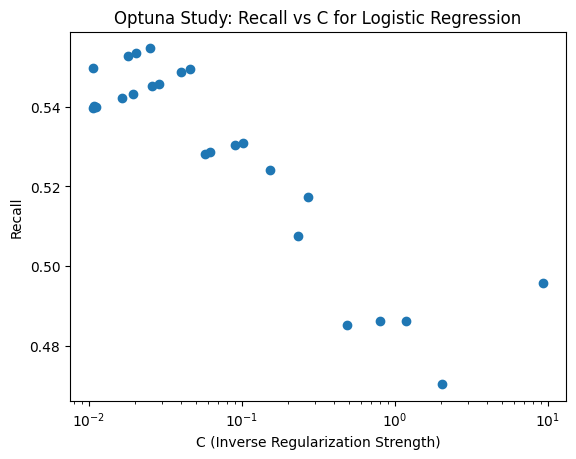

In [ ]:
C_values = study.trials_dataframe()["params_C"]
recall_values = study.trials_dataframe()["value"]

plt.figure()
plt.scatter(C_values, recall_values)
plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Recall")
plt.title("Optuna Study: Recall vs C for Logistic Regression")
plt.show()

In [ ]:
log_reg_pipeline_model3 = Pipeline([
        ("preprocess", preprocess_linear_2),
        ("model", LogisticRegression(
          C = 0.02513,
          multi_class="multinomial",
          solver="lbfgs",
          class_weight="balanced",
          max_iter=20000,
          random_state=108,
          n_jobs=-1
)) ])



In [ ]:
log_reg_pipeline_model3.fit(X_train_3,y_train_3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_...
                                                 ('pipe_waist_to_hip_ratio',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['waist_to_hip_ratio']),
                                                 ('pipe_diabetes_risk_score_pred',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['diabetes_risk_score_pred'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LogisticRegression(C=0.02513, class_weight='balanced',
                                    max_iter=20000, multi_class='multinomial',
                                    n_jobs=-1, random_state=108))])

In [ ]:
y_pred_3_multi = log_reg_pipeline_model3.predict(X_test_3)

In [ ]:
y_proba_3 = log_reg_pipeline_model3.predict_proba(X_test_3)


In [ ]:
print(
    classification_report(
        y_test_3,
        y_pred_3_multi,
        target_names=le.classes_,
        digits=3
    )
)

              precision    recall  f1-score   support

 Gestational      0.014     0.792     0.028        24
      Type 1      0.004     0.500     0.009        10
      Type 2      0.999     0.729     0.843      8966

    accuracy                          0.729      9000
   macro avg      0.339     0.674     0.293      9000
weighted avg      0.996     0.729     0.840      9000



In [ ]:
macro_recall = recall_score(
    y_test_3,
    y_pred_3_multi,
    average="macro"
)

print("Macro Recall:", macro_recall)

Macro Recall: 0.6736219545443278


In [ ]:
macro_f1 = f1_score(
    y_test_3,
    y_pred_3_multi,
    average="macro"
)

print("Macro F1:", macro_f1)


Macro F1: 0.2933652117330304


In [ ]:
cm = confusion_matrix(y_test_3, y_pred_3_multi)

cm_df = pd.DataFrame(
    cm,
    index=le.classes_,
    columns=le.classes_
)

cm_df


,Gestational,Type 1,Type 2
Gestational,19,3,2
Type 1,3,5,2
Type 2,1303,1125,6538


In [ ]:
pr_auc_macro = average_precision_score(
    y_test_3,
    y_proba_3,
    average="macro"
)

print("Macro PR-AUC:", pr_auc_macro)


Macro PR-AUC: 0.3393817286592889


In [ ]:
log_reg_pipeline_model3.fit(Xmodel_3,ymodel_3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_gender',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('pipe_ethnicity',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=20,
                                                                                 sparse_...
                                                 ('pipe_waist_to_hip_ratio',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['waist_to_hip_ratio']),
                                                 ('pipe_diabetes_risk_score_pred',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['diabetes_risk_score_pred'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LogisticRegression(C=0.02513, class_weight='balanced',
                                    max_iter=20000, multi_class='multinomial',
                                    n_jobs=-1, random_state=108))])

In [ ]:
joblib.dump(log_reg_pipeline_model3,"diagnosed_diabetes_type_log_reg_model.pkl")

['diagnosed_diabetes_type_log_reg_model.pkl']